Continuation of my learning through Convolutional Neural Networks in TensorFlow Coursera course

https://www.coursera.org/learn/convolutional-neural-networks-tensorflow/

https://www.kaggle.com/rblcoder/learning-cnn-in-tensorflow-coursera-course

In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from PIL import Image
import os
print(os.listdir("../input"))


['basicshapes', 'stanford-dogs-dataset', 'dice-d4-d6-d8-d10-d12-d20-images']


In [2]:
print(os.listdir("../input/dice-d4-d6-d8-d10-d12-d20-images/dice-d4-d6-d8-d10-d12-d20/dice/train/"))

['d20', 'd4', 'd10', 'd8', 'd12', 'd6']


In [4]:
print(os.listdir("../input/dice-d4-d6-d8-d10-d12-d20-images/dice-d4-d6-d8-d10-d12-d20/dice/train/d20/")[:1])

['d20_wood0149.jpg']


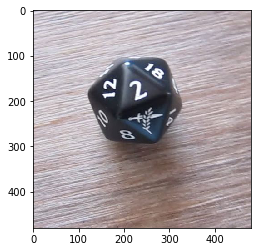

In [6]:
img = np.array(Image.open('../input/dice-d4-d6-d8-d10-d12-d20-images/dice-d4-d6-d8-d10-d12-d20/dice/train/d20/d20_wood0149.jpg'))
plt.imshow(img)

In [7]:
print(os.listdir("../input/basicshapes/shapes/shapes/"))

['triangles', 'circles', 'squares']


In [8]:
print(os.listdir("../input/basicshapes/shapes/shapes/triangles/")[:1])

['drawing(100).png']


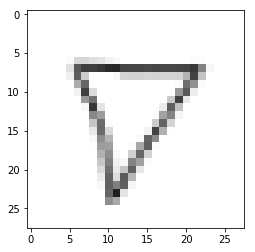

In [9]:
img = np.array(Image.open('../input/basicshapes/shapes/shapes/triangles/drawing(100).png'))
plt.imshow(img)

In [11]:
print(os.listdir("../input/stanford-dogs-dataset/images/Images/")[:5])

['n02113799-standard_poodle', 'n02097209-standard_schnauzer', 'n02085620-Chihuahua', 'n02096051-Airedale', 'n02100735-English_setter']


In [10]:
print(len(os.listdir("../input/stanford-dogs-dataset/images/Images/")))

120


In [12]:
print(os.listdir("../input/stanford-dogs-dataset/images/Images/n02113799-standard_poodle/")[:1])

['n02113799_1980.jpg']


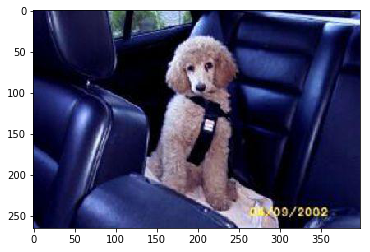

In [13]:
img = np.array(Image.open('../input/stanford-dogs-dataset/images/Images/n02113799-standard_poodle/n02113799_1980.jpg'))
plt.imshow(img)

In [ ]:
train_shapes_path = "../input/basicshapes/shapes/shapes/"
train_dice_path = "../input/dice-d4-d6-d8-d10-d12-d20-images/dice-d4-d6-d8-d10-d12-d20/dice/train/"
train_stanford_dogs_images_path = "../input/stanford-dogs-dataset/images/Images/"

In [ ]:
#print(os.listdir("../input/annotations/Annotation/n02113799-standard_poodle/"))

https://github.com/lmoroney/dlaicourse/blob/master/Exercises/Exercise%205%20-%20Real%20World%20Scenarios/Exercise%205%20-%20Answer.ipynb

In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
IMAGE_HT_WID = 120
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation=tf.nn.leaky_relu, input_shape=(IMAGE_HT_WID, IMAGE_HT_WID, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(32, (3, 3), activation=tf.nn.leaky_relu),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation=tf.nn.leaky_relu),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation=tf.nn.leaky_relu),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(256, (3, 3), activation=tf.nn.leaky_relu),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    #tf.keras.layers.Flatten(),
    tf.keras.layers.GlobalMaxPooling2D(),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dropout(.4), 
    tf.keras.layers.Dense(3, activation='softmax')
])

model.compile(optimizer=RMSprop(lr=0.0001), loss='categorical_crossentropy', metrics=['acc'])
#https://keras.io/preprocessing/image/
#https://medium.com/@arindambaidya168/https-medium-com-arindambaidya168-using-keras-imagedatagenerator-b94a87cdefad
#https://github.com/lmoroney/dlaicourse/blob/master/Exercises/Exercise%205%20-%20Real%20World%20Scenarios/Exercise%205%20-%20Answer.ipynb
TRAINING_DIR = train_shapes_path

train_datagen = ImageDataGenerator(
                               validation_split=0.1,
                               rescale=1./255)



train_generator=train_datagen.flow_from_directory(
                    directory=TRAINING_DIR,
                    subset="training",
                    batch_size=50,
                    seed=42,
                    shuffle=True,
                    class_mode="categorical",
                    target_size=(IMAGE_HT_WID,IMAGE_HT_WID))

valid_generator=train_datagen.flow_from_directory(
                    directory=TRAINING_DIR,
                    subset="validation",
                    batch_size=50,
                    seed=42,
                    shuffle=True,
                    class_mode="categorical",
                    target_size=(IMAGE_HT_WID,IMAGE_HT_WID))

EPOCHS=40
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=valid_generator.n//valid_generator.batch_size
history = model.fit_generator(generator=train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=valid_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=EPOCHS,
                    workers=4,
                    verbose=1
)




In [ ]:

#https://www.tensorflow.org/tutorials/images/transfer_learning
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,max(plt.ylim())])
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
IMAGE_HT_WID = 96
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation=tf.nn.relu, input_shape=(IMAGE_HT_WID, IMAGE_HT_WID, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(256, (3, 3), activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    #tf.keras.layers.Flatten(),
    tf.keras.layers.GlobalMaxPooling2D(),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dropout(.4), 
    tf.keras.layers.Dense(6, activation='softmax')
])

model.compile(optimizer=RMSprop(lr=0.01), loss='categorical_crossentropy', metrics=['acc'])
#https://keras.io/preprocessing/image/
#https://medium.com/@arindambaidya168/https-medium-com-arindambaidya168-using-keras-imagedatagenerator-b94a87cdefad
#https://github.com/lmoroney/dlaicourse/blob/master/Exercises/Exercise%205%20-%20Real%20World%20Scenarios/Exercise%205%20-%20Answer.ipynb
TRAINING_DIR = train_dice_path

train_datagen = ImageDataGenerator(
                               validation_split=0.1,
                               rescale=1./255)



train_generator=train_datagen.flow_from_directory(
                    directory=TRAINING_DIR,
                    subset="training",
                    batch_size=50,
                    seed=42,
                    shuffle=True,
                    class_mode="categorical",
                    target_size=(IMAGE_HT_WID,IMAGE_HT_WID))

valid_generator=train_datagen.flow_from_directory(
                    directory=TRAINING_DIR,
                    subset="validation",
                    batch_size=50,
                    seed=42,
                    shuffle=True,
                    class_mode="categorical",
                    target_size=(IMAGE_HT_WID,IMAGE_HT_WID))

EPOCHS=40
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=valid_generator.n//valid_generator.batch_size
history = model.fit_generator(generator=train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=valid_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=EPOCHS,
                    workers=4,
                    verbose=1
)



In [ ]:

#https://www.tensorflow.org/tutorials/images/transfer_learning
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,max(plt.ylim())])
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
IMAGE_HT_WID = 96
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation=tf.nn.relu, input_shape=(IMAGE_HT_WID, IMAGE_HT_WID, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(256, (3, 3), activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.GlobalMaxPooling2D(),
    tf.keras.layers.Dropout(.4),  
    tf.keras.layers.Dense(512, activation=tf.nn.leaky_relu),
    tf.keras.layers.Dropout(.4),  
    tf.keras.layers.Dense(120, activation='softmax')
])

model.compile(optimizer=RMSprop(lr=0.01), loss='categorical_crossentropy', metrics=['acc'])

In [ ]:
#https://keras.io/preprocessing/image/
#https://medium.com/@arindambaidya168/https-medium-com-arindambaidya168-using-keras-imagedatagenerator-b94a87cdefad
#https://github.com/lmoroney/dlaicourse/blob/master/Exercises/Exercise%205%20-%20Real%20World%20Scenarios/Exercise%205%20-%20Answer.ipynb
TRAINING_DIR = train_stanford_dogs_images_path

train_datagen = ImageDataGenerator(
#                                rotation_range=15,
#                                width_shift_range=0.1,
#                                height_shift_range=0.1,
#                                shear_range=0.01,
#                                zoom_range=[0.9, 1.25],
#                                horizontal_flip=True,
#                                vertical_flip=False,
#                                fill_mode='reflect',
#                                #data_format='channels_last',
#                                brightness_range=[0.5, 1.5],
                               validation_split=0.1,
                               rescale=1./255)



train_generator=train_datagen.flow_from_directory(
                    directory=TRAINING_DIR,
                    subset="training",
                    batch_size=50,
                    seed=42,
                    shuffle=True,
                    class_mode="categorical",
                    target_size=(IMAGE_HT_WID,IMAGE_HT_WID))

valid_generator=train_datagen.flow_from_directory(
                    directory=TRAINING_DIR,
                    subset="validation",
                    batch_size=50,
                    seed=42,
                    shuffle=True,
                    class_mode="categorical",
                    target_size=(IMAGE_HT_WID,IMAGE_HT_WID))

In [ ]:
EPOCHS=25
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=valid_generator.n//valid_generator.batch_size
history = model.fit_generator(generator=train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=valid_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=EPOCHS,
                    workers=4,
                    verbose=1
)

In [ ]:
#https://www.tensorflow.org/tutorials/images/transfer_learning
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,max(plt.ylim())])
plt.title('Training and Validation Loss')
plt.show()